# Calories Burned Prediction

dataset link :  https://thecleverprogrammer.com/2020/11/26/calories-burned-prediction-with-python/

## Let's start by importing libraries

In [1]:
import pandas as pd                   #To read the Data from the file
import numpy as np                    # For fast implementation of calculations
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt       # For plotting the graphs as required
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


plt.rcParamsDefault['figure.figsize']= [10,6]
mpl.style.use('seaborn-talk')
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns', None)

In [2]:
calories = pd.read_csv(r'calories burn prediction/calories.csv')
exercise = pd.read_csv(r'calories burn prediction/exercise.csv')
# Merge the Data using the two datasets using the User_ID
data = pd.merge(exercise,calories,on='User_ID')

In [3]:
data.head()

User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
0  14733363    male   68   190.0    94.0      29.0       105.0       40.8   
1  14861698  female   20   166.0    60.0      14.0        94.0       40.3   
2  11179863    male   69   179.0    79.0       5.0        88.0       38.7   
3  16180408  female   34   179.0    71.0      13.0       100.0       40.5   
4  17771927  female   27   154.0    58.0      10.0        81.0       39.8   

   Calories  
0     231.0  
1      66.0  
2      26.0  
3      71.0  
4      35.0

In [4]:
data.describe()

User_ID           Age        Height        Weight      Duration  \
count  1.500000e+04  15000.000000  15000.000000  15000.000000  15000.000000   
mean   1.497736e+07     42.789800    174.465133     74.966867     15.530600   
std    2.872851e+06     16.980264     14.258114     15.035657      8.319203   
min    1.000116e+07     20.000000    123.000000     36.000000      1.000000   
25%    1.247419e+07     28.000000    164.000000     63.000000      8.000000   
50%    1.499728e+07     39.000000    175.000000     74.000000     16.000000   
75%    1.744928e+07     56.000000    185.000000     87.000000     23.000000   
max    1.999965e+07     79.000000    222.000000    132.000000     30.000000   

         Heart_Rate     Body_Temp      Calories  
count  15000.000000  15000.000000  15000.000000  
mean      95.518533     40.025453     89.539533  
std        9.583328      0.779230     62.456978  
min       67.000000     37.100000      1.000000  
25%       88.000000     39.600000     35.000000  
50%       96.000000     40.200000     79.000000  
75%      103.000000     40.600000    138.000000  
max      128.000000     41.500000    314.000000

From above description its clear that there is no missing data

## Plotting of the Data

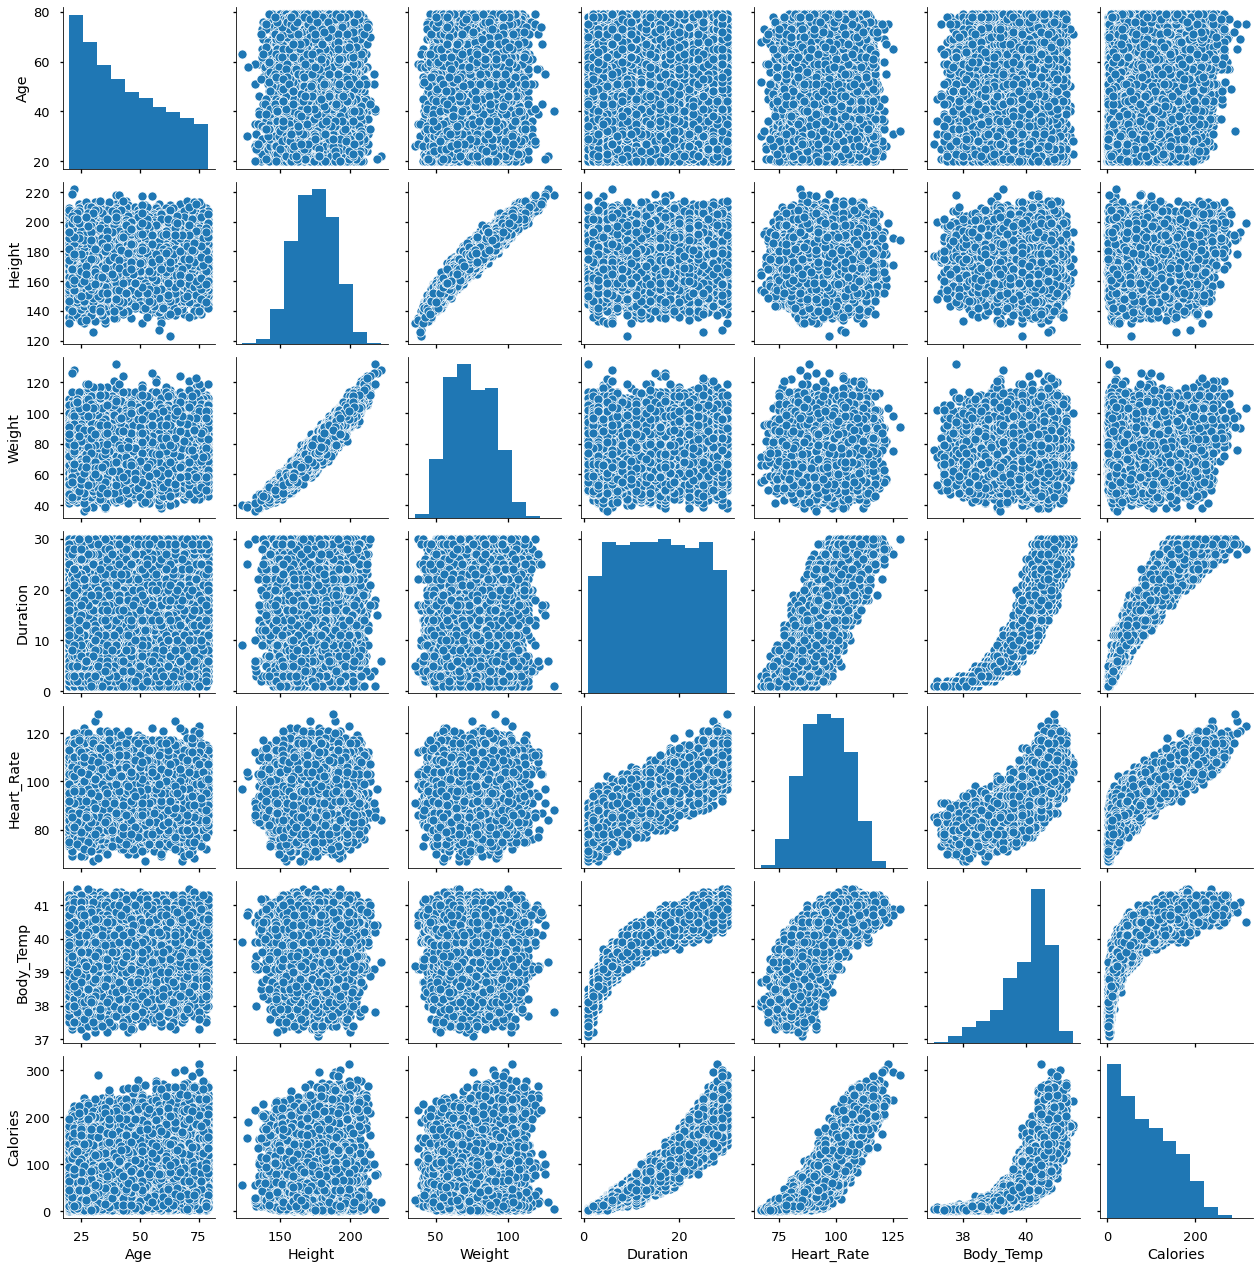

In [5]:
sns.pairplot(data[['Age','Height','Weight','Duration','Heart_Rate','Body_Temp','Calories']])

#### From Above plot its clear that there is some dependence on the Duration,Heart_Rate,Body_Temp for the Calories Burned and the Age,Height,Weight are Independent Features ..

#### We have one categorical feature i.e. Gender so let's map them 

Male : 1 , Female : 0

And

Let's take X as features which are required for prediction of calories burned i.e. ['Gender','Duration','Heart_Rate','Body_Temp'] 
and y as Calories

In [6]:
data['Gender'] = data['Gender'].apply(lambda x: 1 if x=='male' else 0)
X = data[['Gender','Duration','Heart_Rate','Body_Temp']]
y = data['Calories'].values

## Model

#### Let's split the data into train_set,test_set and take the classifer(clf) as LinearRegression model 

In [7]:
clf = LinearRegression()
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

In [8]:
clf.fit(X_train,y_train)

LinearRegression()

In [9]:
print("Model Coefficient : ",clf.coef_)
print("Model Intercept : ",clf.intercept_)

Model Coefficient :  [  2.06574509   6.62935769   2.0076081  -16.82737886]
Model Intercept :  467.34458794680984


In [10]:
X_train_df = pd.DataFrame(X_train,columns=X.columns)
X_test_df = pd.DataFrame(X_test,columns=X.columns)

In [11]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print("Mean Squared Error : ",mean_squared_error(y_test,clf.predict(X_test)))
print("R2_Score : ",r2_score(y_test,clf.predict(X_test)))

Mean Squared Error :  196.9006317014126
R2_Score :  0.9489714523730007


## Let's predict the calories

In [12]:
predicted_calories = clf.predict(X)
data['Predicted_Calories'] = predicted_calories

In [13]:
tested_predicted_calories = clf.predict(X_test)
X_test_df['Calories'] = y_test
X_test_df['Predicted_Calories'] = tested_predicted_calories
X_test_df.head()

Gender  Duration  Heart_Rate  Body_Temp  Calories  Predicted_Calories
1670        0       9.0        94.0       39.8      43.0           45.994290
13379       1       6.0        82.0       39.3      15.0           12.494354
10234       0      22.0        95.0       40.8     101.0          117.356169
4719        1      29.0       111.0       41.1     186.0          192.900934
7003        0      19.0       103.0       40.1     126.0          125.308126

In [14]:
train_predicted_calories = clf.predict(X_train)
X_train_df['Calories'] = y_train
X_train_df['Predicted_Calories'] = train_predicted_calories
X_train_df.head()

Gender  Duration  Heart_Rate  Body_Temp  Calories  Predicted_Calories
13136       1       8.0        95.0       39.5      57.0           48.486499
3536        0       9.0        92.0       39.9      47.0           40.296336
10296       0      17.0        88.0       40.1      67.0           81.935289
2137        0       9.0        85.0       39.5      35.0           32.974031
14775       1       6.0        91.0       39.2      25.0           32.245565

In [15]:
data = data.set_index('User_ID')
data

Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
User_ID                                                                  
14733363       1   68   190.0    94.0      29.0       105.0       40.8   
14861698       0   20   166.0    60.0      14.0        94.0       40.3   
11179863       1   69   179.0    79.0       5.0        88.0       38.7   
16180408       0   34   179.0    71.0      13.0       100.0       40.5   
17771927       0   27   154.0    58.0      10.0        81.0       39.8   
15130815       0   36   151.0    50.0      23.0        96.0       40.7   
19602372       0   33   158.0    56.0      22.0        95.0       40.5   
11117088       1   41   175.0    85.0      25.0       100.0       40.7   
12132339       1   60   186.0    94.0      21.0        97.0       40.4   
17964668       0   26   146.0    51.0      16.0        90.0       40.2   
13723164       0   36   177.0    76.0       1.0        74.0       37.8   
13681290       0   21   157.0    56.0      17.0       100.0       40.0   
15566424       1   66   171.0    79.0      11.0        90.0       40.0   
12891699       0   32   157.0    54.0      18.0        93.0       40.4   
13823829       1   53   182.0    85.0       2.0        82.0       38.1   
17557348       0   39   156.0    62.0      28.0       104.0       40.8   
12198133       1   39   182.0    82.0       4.0        82.0       38.6   
15236104       1   46   169.0    67.0      11.0        89.0       40.2   
11042324       0   27   171.0    65.0       4.0        85.0       38.6   
16864285       1   50   188.0    86.0      14.0        94.0       40.2   
11674347       1   67   189.0    93.0       8.0        77.0       39.2   
19797300       0   31   148.0    50.0       8.0        84.0       39.5   
14711095       0   33   157.0    60.0       3.0        80.0       38.7   
14434854       0   20   165.0    59.0      29.0       100.0       41.0   
14893804       1   48   182.0    85.0       1.0        80.0       37.7   
17231597       1   29   176.0    75.0      10.0        83.0       39.7   
10901446       1   33   173.0    73.0       7.0        78.0       39.3   
15874362       1   42   190.0    88.0       3.0        83.0       38.9   
15569252       0   62   159.0    59.0      29.0       106.0       41.2   
15615743       1   38   171.0    75.0       2.0        81.0       38.2   
13363046       1   20   183.0    88.0      16.0        97.0       40.5   
17572853       0   25   160.0    59.0      24.0       102.0       40.3   
17157339       0   24   165.0    59.0      18.0        91.0       40.2   
18328111       0   42   165.0    68.0      22.0        93.0       40.8   
19303479       1   22   182.0    84.0      29.0       114.0       41.0   
10699201       0   74   158.0    59.0      10.0        93.0       39.6   
15283313       0   70   154.0    59.0      10.0        88.0       40.0   
16324247       0   26   182.0    80.0      21.0        96.0       40.5   
14277710       1   44   184.0    86.0      25.0       114.0       40.8   
10888188       1   61   183.0    86.0       1.0        81.0       38.3   
13379795       0   68   157.0    57.0      13.0        92.0       40.1   
17181524       0   61   176.0    70.0      20.0       104.0       40.5   
15988442       1   63   179.0    80.0      25.0       108.0       40.8   
19538533       0   54   171.0    66.0      20.0        98.0       40.1   
14591877       0   54   169.0    66.0       3.0        80.0       38.9   
14274480       0   47   155.0    55.0      16.0        93.0       40.5   
16818429       1   33   184.0    86.0       8.0        86.0       39.9   
17476522       0   24   171.0    66.0      24.0       105.0       40.6   
16369885       1   24   195.0    98.0      20.0        96.0       40.6   
17816292       1   48   152.0    59.0       2.0        79.0       38.0   
15995398       1   35   193.0    93.0      10.0        83.0       39.7   
17615432       1   21   168.0    71.0       3.0        78.0       38.5   
10146087      